In [129]:
# do not touch this cell 
%load_ext jupyter_record


The jupyter_record extension is already loaded. To reload it, use:
  %reload_ext jupyter_record


# Imports


In [112]:
%%git_commit

import pandas as pd
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack,vstack
import numpy as np


# Dataset Load




In [142]:
%%git_commit

training = pd.read_csv('../archive/training.csv')
testing_X = pd.read_csv('../archive/testing_X.csv')
testing_y = pd.read_csv('../archive/testing_y.csv')



In [146]:
%%git_commit
training.keys()

Index(['Unnamed: 0', 'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled',
       'Diverted', 'CRSDepTime', 'CRSElapsedTime', 'Distance', 'Year',
       'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'CRSArrTime'],
      dtype='object')

In [23]:
%%git_commit

training = training.dropna()
testing = testing.dropna()





In [136]:
%%git_commit

dropped_column = ['Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'DepTime', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime', 'DepDelayMinutes', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings']




In [134]:
%%git_commit

for column in dropped_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)


In [138]:
%%git_commit
testing = testing.dropna()

In [139]:
%%git_commit
testing.keys()

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'CRSElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'CRSArrTime'],
      dtype='object')

In [140]:
%%git_commit

testing_y = testing['DepDel15']

testing_X = testing.drop('DepDel15', axis = 1)

In [141]:
%%git_commit

testing_y.to_csv('../archive/testing_y.csv')
testing.to_csv('../archive/testing_X.csv')

In [17]:
%%git_commit


training['CRSDepTime'].unique()

array([1025, 1555, 1630, ...,  438,  317,  441])

# Sort by Appropriate Data

'Month', 'DayofMonth', 'CRSDepTime' -> not actually completely information free, but good enough

In [26]:
%%git_commit
training = training.sort_values(['Month', 'DayofMonth', 'CRSDepTime'])
testing = testing.sort_values(['Month', 'DayofMonth', 'CRSDepTime'])


In [28]:
%%git_commit

training.keys()

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'CRSElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'CRSArrTime'],
      dtype='object')

# One Hot Encode


In [29]:
%%git_commit

d2_column = ['FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners' ,  'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'OriginAirportSeqID', 'DestAirportSeqID', 'CRSArrTime', 'DestStateName', 'DestState', 'DestCityName', 'OriginStateName', 'OriginState', 'OriginCityName','Year',  'Diverted', 'Cancelled', 'Tail_Number', 'Quarter',  'DayOfWeek', ]


In [30]:
%%git_commit

for column in d2_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)
    

In [36]:
%%git_commit

training.reset_index()
testing.reset_index()


,index,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Month,DayofMonth,Operating_Airline,OriginAirportID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestCityMarketID,DestStateFips,DestWac,DepDel15
0,7915905,United Air Lines Inc.,SFO,ORD,19,246.0,1846.0,1,1,UA,14771,32457,6,91,13930,30977,17,41,0.0
1,7916349,United Air Lines Inc.,SFO,IAH,25,215.0,1635.0,1,1,UA,14771,32457,6,91,12266,31453,48,74,0.0
2,7531120,Alaska Airlines Inc.,SEA,ORD,35,245.0,1721.0,1,1,AS,14747,30559,53,93,13930,30977,17,41,0.0
3,7915616,United Air Lines Inc.,LAX,EWR,45,318.0,2454.0,1,1,UA,12892,32575,6,91,11618,31703,34,21,0.0
4,7868252,Frontier Airlines Inc.,DEN,RSW,50,221.0,1607.0,1,1,F9,11292,30325,8,82,14635,31714,12,33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978587,4253635,JetBlue Airways,LAS,JFK,2347,292.0,2248.0,12,31,B6,12889,32211,32,85,12478,31703,36,22,0.0
978588,4311059,Delta Air Lines Inc.,LAS,ATL,2350,221.0,1747.0,12,31,DL,12889,32211,32,85,10397,30397,13,34,0.0
978589,4520800,United Air Lines Inc.,PHX,IAD,2355,240.0,1956.0,12,31,UA,14107,30466,4,81,12264,30852,51,38,0.0
978590,4253480,JetBlue Airways,JFK,BQN,2358,224.0,1576.0,12,31,B6,12478,31703,36,22,10732,30732,72,3,0.0


In [32]:
%%git_commit

encoders = {}

one_hot = ['DestWac', 'DestStateFips', 'DestCityMarketID', 'DestAirportID', 'OriginWac', 'OriginStateFips', 'OriginCityMarketID', 'OriginAirportID', 'Operating_Airline', 'Dest', 'Origin', 'Airline' ]


In [35]:
%%git_commit

for hot in one_hot:
    encode = OneHotEncoder(handle_unknown = 'ignore')
    encode.fit(training[hot].to_numpy().reshape(-1, 1))
    encoders[hot] = encode

# Generate Time Series

In [66]:
%%git_commit

def get_previous_rows(df, current_row_index, previous_rows_num = 10):
    ''' Given a sorted pandas dataframe and row index, return previous rows
    
    df: dataframe, eg. the training dataset
    current_row_index: row index to get previous rows from
    previous_rows_num: 
    
    
    '''
    if previous_rows_num <= 0:
        raise ValueError('invalid row number')
    index = current_row_index - previous_rows_num
    if index < 0:
        raise ValueError('current_row_index less than previous_rows_num')
    subset = df.iloc[index:current_row_index]
    return subset


month_days = {1: 31, 2: 29, 3: 31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}


def _get_previous_days(num, month, day):
    last = (month, day)
    previous_days = [last]
    for i in range(num - 1):
        m, d = previous_days[-1]
        if d == 1:
            m -= 1
            if m == 0:
                raise ValueError('previous days not in dataset')
            d = month_days[m]
        else:
            d -= 1
        
        previous_days.append((d, m))



def get_previous_days(df, current_row_index, previous_days = 14):
    ''' Given a sorted pandas dataframe with columns 'Month', 'DayofMonth', 'CRSDepTime', and a row index, 
    return the rows that are 'previous_days' days before 'df.iloc[current_row_index]'
    
    Note: this includes flights on the current day that have an estimated departure time BEFORE the df.iloc[current_row_index]
    
    df: dataframe, eg. training dataset
    current_row_index: row index to evaluate
    previous_days: number of days prior to row, counting current one
    
    '''
    raise NotImplemented()
    



In [61]:
%%git_commit



# Get Feature



In [40]:
%%git_commit

d3_column = ['Month', 'DayofMonth']


for column in d3_column:
    training = training.drop(column, axis = 1)
    testing = testing.drop(column, axis = 1)


In [86]:
%%git_commit

# features: count of previous 20
not_hot = ['CRSDepTime', 'CRSElapsedTime', 'Distance']



def get_feature_vector(sub_df, is_scalar = False):
    array = []
    for hot in one_hot:
        x = np.asarray(sub_df[hot]).reshape(-1, 1)
        x = encoders[hot].transform(x)
        array.append(x)
    for col in not_hot:
        x = np.asarray(sub_df[col]).reshape(-1, 1)
        array.append(x)

    X_train = hstack(array)
    y_train = np.asarray(sub_df['DepDel15']).reshape(-1)
    
    return X_train, y_train


def get_features_row(df, index):
    prev_rows = get_previous_rows(df, index)
    prev_X, prev_Y = get_feature_vector(prev_rows)
    prev_Y = prev_Y.reshape(-1, 1)   
    prev_features = hstack([prev_X, prev_Y])
    prev_features = np.sum(prev_features, axis = 0)
    X, y = get_feature_vector(df.iloc[index], is_scalar = True)
    X = hstack([prev_features, X])
    return X, y


get_features_row(training, 20)
    

(<1x4873 sparse matrix of type '<class 'numpy.float64'>'
 	with 116 stored elements in COOrdinate format>,
 array([0.]))

In [96]:
%%git_commit

X_train = []
y_train = []
X_test = []
y_test = []

print(training.shape)
print(testing.shape)

(980430, 16)
(978592, 16)


In [97]:
%%git_commit

train = np.random.choice(np.arange(20, 980430), size = 50000, replace=False)
test =  np.random.choice(np.arange(20, 978592), size = 50000, replace=False)  

In [100]:
%%git_commit

for i,j in enumerate(train):
    if i%1000 == 0:
        print(i)
    X, y = get_features_row(training, j)
    X_train.append(X)
    y_train.append(y)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


In [101]:
%%git_commit
for i,j in enumerate(test):
    if i%1000 == 0:
        print(i)
    X, y = get_features_row(testing, j)
    X_test.append(X)
    y_test.append(y)
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


In [110]:
%%git_commit
for i in range(len(y_test)):
    y_test[i] = y_test[i].reshape((-1, 1))

for i in range(len(y_train)):
    y_train[i] = y_train[i].reshape((-1, 1))
    


In [ ]:
%%git_commit
print(y_)

In [115]:
%%git_commit
#X_test = vstack(tuple(X_test))
#y_test = vstack(y_test)
X_train = vstack(X_train)
#y_train = vstack(y_train)

In [120]:
%%git_commit
y_test = np.concatenate(y_test, axis = 0)
y_train = np.concatenate(y_train, axis = 0)

In [122]:
%%git_commit
y_test = y_test.reshape(-1)
y_train = y_train.reshape(-1)

# Model Training


In [106]:
%%git_commit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [123]:
%%git_commit
model = RandomForestClassifier(min_samples_leaf = 100)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=100)

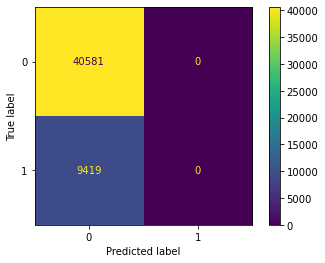

In [124]:
%%git_commit
y_out = model.predict(X_test)
matrix = confusion_matrix(y_test, y_out)
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [125]:
%%git_commit
print(accuracy_score(y_test, y_out))

0.81162


In [ ]:
%%git_commit
